In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [ ]:

df=pd.read_csv('salary_data.csv')


In [ ]:
df.head()


,Experience_years,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.tail()

,Experience_years,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
df.shape

(30, 2)

## Discover and visualize the data to gain insights

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience_years  29 non-null     float64
 1   Salary            30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.describe()


,Experience_years,Salary
count,29.000000,30.000000
mean,5.313793,76003.000000
std,2.888119,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.500000,65237.000000
75%,7.900000,100544.750000
max,10.500000,122391.000000


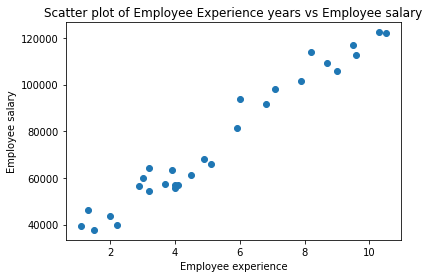

In [ ]:
plt.scatter(x = df.Experience_years, y = df. Salary)
plt.xlabel("Employee experience")
plt.ylabel("Employee salary")
plt.title("Scatter plot of Employee Experience years vs Employee salary")
plt.show()

## Prepare the data for machine learning Model

In [ ]:
#datacleaning


In [ ]:
df.isnull().sum()


Experience_years    1
Salary              0
dtype: int64

In [ ]:
df.mean()


Experience_years        5.313793
Salary              76003.000000
dtype: float64

In [ ]:
df2=df.fillna(df.mean())

In [ ]:
df2.isnull().sum()


Experience_years    0
Salary              0
dtype: int64

In [ ]:
df2.head()

,Experience_years,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df2.tail()


,Experience_years,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
#split dataset

In [ ]:
x = df2.iloc[:, :-1].values
y = df2.iloc[:,1].values
print("shape of x = ",x.shape)
print("shape of y= ",y.shape)

shape of x =  (30, 1)
shape of y=  (30,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 1/3, random_state=0)
print("shape of x_train = ",x_train.shape)
print("shape of y_train = ",y_train.shape)
print("shape of x_test = ",x_test.shape)
print("shape of y_test = ",y_test.shape)


shape of x_train =  (20, 1)
shape of y_train =  (20,)
shape of x_test =  (10, 1)
shape of y_test =  (10,)


#select a model and train it

In [ ]:
#y = m * x + c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([9345.94244312])

In [ ]:
lr.intercept_

26816.192244031183

In [ ]:
y_pred = lr.predict(x_test)
y_pred


array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76478.59674352, 100649.1375447 ])

## Visualise the dataset

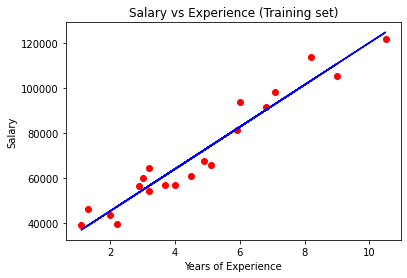

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
# plot the regression line
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

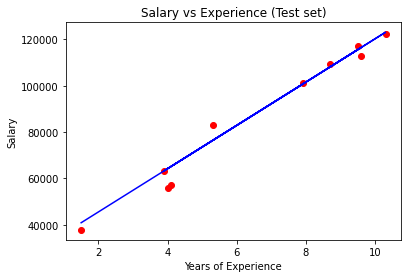

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
# plot the regression line
plt.plot(x_test, lr.predict(x_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Experience","salary","Predicted_salary"])

,Experience,salary,Predicted_salary
0,1.500000,37731.0,40835.105909
1,10.300000,122391.0,123079.399408
2,4.100000,57081.0,65134.556261
3,3.900000,63218.0,63265.367772
4,9.500000,116969.0,115602.645454
5,8.700000,109431.0,108125.891499
6,9.600000,112635.0,116537.239698
7,4.000000,55794.0,64199.962017
8,5.313793,83088.0,76478.596744
9,7.900000,101302.0,100649.137545


## Make new prediction

In [ ]:
new_salary_pred =lr.predict([[15]]).round(2)
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [167005.33]


#Fine tune your model

In [ ]:
lr.score(x_test,y_test)

0.9751207181519028

## Save ML model

In [ ]:
import joblib
joblib.dump(lr,"Salary_predictor_model.pkl")

['Salary_predictor_model.pkl']

In [ ]:
model=joblib.load("Salary_predictor_model.pkl")

In [ ]:
model.predict([[5]])

array([73545.90445964])